# ⚙️ Get dataset from Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("najir0123/walmart-10k-sales-datasets")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/najir0123/walmart-10k-sales-datasets/versions/1


## 📤 Load dependencies

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## 📤Load data

In [ ]:
data = pd.read_csv(path + "/Walmart.csv")
data.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


## 💡 Understand the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


OBSERVATIONS:

- `unit_price` and `quantity` both have 31 missing values.
- `unit_price` should be of type float64.

In [ ]:
# Snapshot of the distribution and central tendency of numerical variables
data.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


OBSERVATIONS:
- The majority of the ratings are below 7 and quantities are below 3.


In [ ]:
# Check for duplicates
data.duplicated().sum()

51

# 🧹 Data Cleaning

In [ ]:
# Drop all duplicate records
data.drop_duplicates(inplace=True)

*Since the goal is to accurately describe past data, removing rows or columns with missing values is a practical approach.*

In [ ]:
# Drop all records with missing values
data.dropna(inplace=True)

# Verify that there are no more missing values
data.isnull().sum().any()

False

In [ ]:
# Convert all column names to lowercase for consistency
data.columns = [col.lower() for col in data.columns.to_list()]

In [ ]:
data.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

In [ ]:
# Convert date to dtype datetime
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%y')


In [ ]:
# Remove dollar sign from unit_price
data['unit_price'] = data['unit_price'].str.replace('$', '')

# Change data type of unit_price to float
data['unit_price'] = data['unit_price'].astype('float64')

# Count of records
data.shape[0]

9969

In [ ]:
# Create a new column
data['total_revenue'] = data['unit_price'] * data['quantity']

In [ ]:
df = data.copy()

# 🔍 Exploratory Data Analysis

In [ ]:
# Export clean data to csv
df.to_csv('walmart_cleaned.csv', index=False)

## Total transactions by payment method

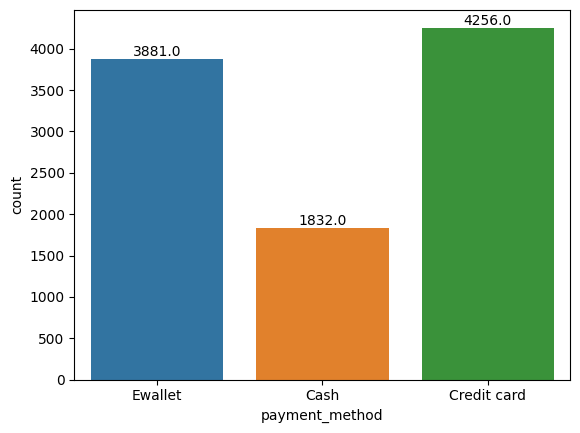

In [ ]:
## Total transactions by payment method
ax =sns.countplot(x='payment_method', data=df, hue='payment_method')

# Iterate over each bar and display the count value above it
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()